## About Dataset
This dataset contains simulated customer data that can be used for segmentation analysis. It includes demographic and behavioral information about customers, which can help in identifying distinct segments within the customer base. This can be particularly useful for targeted marketing strategies, improving customer satisfaction, and increasing sales.

Columns:
   
   id: Unique identifier for each customer.
   
   age: Age of the customer.

   
   gender: Gender of the customer (Male, Female, Other).
   
   income: Annual income of the customer (in USD).
   
   spending_score: Spending score (1-100), indicating the customer's spending behavior and loyalty.
   
   membership_years: Number of years the customer has been a member.
   
   
   purchase_frequency: Number of purchases made by the customer in the last year.
   
   preferred_category: Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).
   
   last_purchase_amount: Amount spent by the customer on their last purchase (in USD).



    
    Potential Uses:
      
      Customer Segmentation: Identify different customer segments based on their demographic and behavioral characteristics.
      
      Targeted Marketing: Develop targeted marketing strategies for different customer segments.
      
      Customer Loyalty Programs: Design loyalty programs based on customer spending behavior and preferences.
      
      Sales Analysis: Analyze sales patterns and predict future trends.

# Step 1: Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from collections import Counter
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
import os


In [2]:
# Create directory for saving visualizations
os.makedirs('imgs', exist_ok=True)


# Step 2: Load the Dataset

In [3]:
data = pd.read_csv("customer_segmentation_data.csv", index_col = "id")
data.head() 

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08


# Step 3: Checking for Missing Values.

In [4]:
data.isnull().sum() 

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

**Note:**
The all-zero output is excellent! It confirms that there are no missing values in our dataset. This means we don't need to perform any data imputation or handle missing data at this stage, and we can proceed directly with further analysis.


# Step 4: Check Data Types

In [5]:
data.dtypes 

age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

**Note:**
These data types look appropriate for the nature of the data described in the dataset description.
- `int64` for 'age', 'income', 'spending_score', 'membership_years', 'purchase_frequency' - These are numerical counts or scores, so integer type is suitable.
- `object` for 'gender' and 'preferred_category' - These are categorical features represented as strings, so 'object' type is correct.
- `float64` for 'last_purchase_amount' - This is a monetary value, so float type is appropriate to handle decimal values.

Since the data types are valid, we can now proceed with Exploratory Data Analysis (EDA) to understand the characteristics of each feature and relationships between them.


# Step 5: Exploratory Data Analysis - Analyzing 'age' Feature

In [6]:
data['age'].describe() 

count    1000.000000
mean       43.783000
std        15.042213
min        18.000000
25%        30.000000
50%        45.000000
75%        57.000000
max        69.000000
Name: age, dtype: float64

**Note:**
- `count`: There are 1000 entries, meaning we have age data for all 1000 customers.
- `mean`: The average age is approximately 43.78 years.
- `std`: The standard deviation is about 15.04 years, indicating the spread or variability in ages.
- `min`: The youngest customer is 18 years old.
- `25%`: 25% of customers are 30 years old or younger.
- `50%` (Median): The median age is 45 years, meaning half of the customers are younger and half are older than 45.
- `75%`: 75% of customers are 57 years old or younger.
- `max`: The oldest customer is 69 years old.

**Why:** These statistics give us a numerical summary of the age distribution in our customer base. We learn about the typical age, the range of ages, and how spread out the ages are. This is helpful for understanding the demographic makeup of our customers in terms of age. The fact that the mean (43.78) and median (45) are close suggests a roughly symmetrical age distribution.


# Step 6: Visualize 'age' Distribution

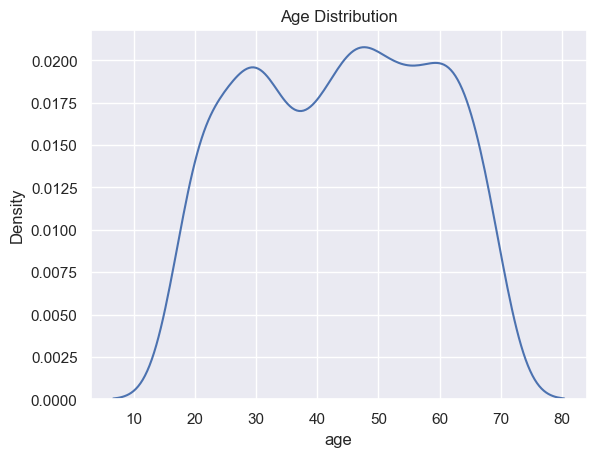

In [7]:
sns.set_theme(style="darkgrid") 
sns.kdeplot(data['age']) 
plt.title("Age Distribution") 
plt.savefig('imgs/01_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show() 

**Note (Step 6 - Plot Interpretation):**

**What we see in the plot:**

- **Shape:** The distribution is approximately bell-shaped, resembling a normal distribution.
- **Peak:** The peak of the distribution is around the mid-40s age range (visually, around 40-50). This corresponds with the mean and median age we saw in the descriptive statistics (around 43-45 years).
- **Spread:** The distribution is not too narrow, indicating a range of ages, but it's also not extremely flat, showing a concentration of customers around the peak age. The curve starts rising noticeably around age 20 and tails off around age 70-75.
- **Symmetry:** The distribution looks reasonably symmetrical around the peak, meaning it's not heavily skewed to the left or right.

**Why is this important?**

- **Customer Base Age Range:** The plot confirms that the majority of customers are concentrated in the early to late adult age ranges (roughly 30s to 60s), with the peak in the mid-40s. This is valuable demographic information.
- **Marketing Implications:** Understanding the age distribution can inform marketing strategies. For instance, marketing messages and channels can be tailored to be most effective for this age demographic. Products and services offered could also be aligned with the needs and preferences of this age group.
- **Segmentation Insights:** While age alone might not be the only basis for segmentation, it's a significant demographic factor to consider. We can now explore if age, in combination with other features, can help us define distinct customer segments.


# Step 7: Exploratory Data Analysis - Analyzing 'gender' Feature

In [8]:
data['gender'].unique()

array(['Female', 'Other', 'Male'], dtype=object)

# Step 8: Exploratory Data Analysis - Analyzing Gender Counts.

In [9]:
data['gender'].value_counts()

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

## Note (Step 8 - Output Interpretation):

- **Male**: 357 customers are categorized as 'Male'.
- **Other**: 327 customers are categorized as 'Other'.
- **Female**: 316 customers are categorized as 'Female'.

### Gender Balance:
We can see that the counts for all three gender categories are quite close (357, 327, 316). No single gender group overwhelmingly dominates the dataset in terms of count.

### Further Analysis:
While counts are informative, it's often helpful to express these as percentages of the total customer base to easily compare proportions. We could do that next, or visualize these counts using a bar chart.


# Step 9: Exploratory Data Analysis - Calculating Gender Percentages.

In [10]:
Gender_percentages = {
    'Female': (316/1000) * 100, 
    'Male': (357/1000) * 100, 
    'Other': (327/1000) * 100} 

# Print the percentages
for gender, percentage in Gender_percentages.items():
    print(f"{gender} percentage: {percentage:.2f}%") 

Female percentage: 31.60%
Male percentage: 35.70%
Other percentage: 32.70%


## Note (Step 9 - Output Interpretation):

- **Female percentage**: 31.60%: Approximately 31.6% of the customers in the dataset are Female.
- **Male percentage**: 35.70%: Approximately 35.7% of the customers are Male.
- **Other percentage**: 32.70%: Approximately 32.7% of the customers identify as Other.


### Visualizing Proportions:
Percentages are often more readily grasped when comparing segment sizes than raw counts. These percentages could be easily visualized using a pie chart or bar chart if needed for presentations.


# Step 10: Exploratory Data Analysis - Analyzing 'income' Feature

In [11]:
data['income'].describe()

count      1000.000000
mean      88500.800000
std       34230.771122
min       30004.000000
25%       57911.750000
50%       87845.500000
75%      116110.250000
max      149973.000000
Name: income, dtype: float64

## Note (Step 10 - Output Interpretation):

- **count**: There are 1000 entries, meaning we have income data for all 1000 customers.
- **mean**: The average annual income of customers is approximately $88,500.80.
- **std**: The standard deviation is $34,230.77. This is a relatively large standard deviation, indicating a significant spread or variability in customer incomes.
- **min**: The lowest annual income in the dataset is $30,004.00.
- **25%**: 25% of customers have an annual income of $57,911.75 or less.
- **50% (Median)**: The median annual income is $87,845.50. 
This is very close to the mean, suggesting a roughly symmetrical income distribution (or at least not heavily skewed).
- **75%**: 75% of customers have an annual income of $116,110.25 or less.
- **max**: The highest annual income in the dataset is $149,973.00.


### Average Income:
The mean and median income around $88,000 - $89,000 gives us a sense of the typical income level of customers.

### Income Range & Variability:
The range from $30,000 to $150,000 and the substantial standard deviation indicate that there is a wide range of income levels within the customer base, from relatively lower to higher income earners. This income diversity could be a basis for customer segmentation.



# Step 11: Visualize 'income' Distribution

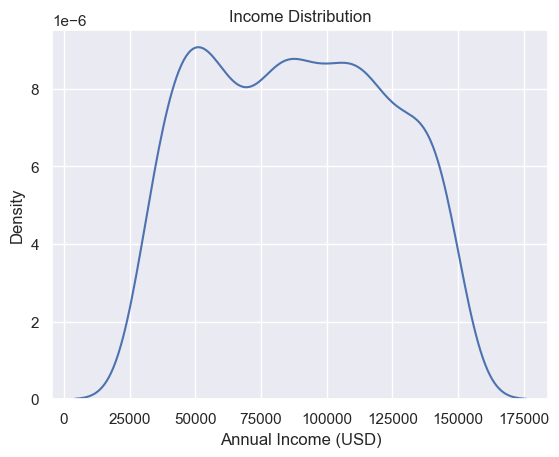

In [12]:
sns.set_theme(style="darkgrid") 
sns.kdeplot(data['income']) 
plt.title("Income Distribution") 
plt.xlabel("Annual Income (USD)") 
plt.savefig('imgs/02_income_distribution.png', dpi=300, bbox_inches='tight')
plt.show() 

**Note (Step 11 - Plot Interpretation):**

**What we see in the plot:**

- **Shape:** The income distribution appears to be roughly bell-shaped, somewhat similar to a normal distribution, although perhaps a bit flatter and wider.
- **Peak/Mode:** There is a clear peak in the distribution, and it seems to be centered around the \$80,000 - \$90,000 annual income range (visually, it looks like the peak is around \$85,000 - \$90,000). This aligns well with the mean and median income values we saw in the descriptive statistics (around \$88,000 - \$89,000).
- **Skewness:** The distribution looks reasonably symmetrical around the peak. There might be a slight hint of right-skewness (a slightly longer tail towards higher incomes, visible on the right side of the peak extending towards \$150,000 - \$175,000), but it's not strongly skewed.
- **Spread:** The distribution is relatively broad, covering a range of incomes from around \$30,000 up to nearly \$150,000. This visual spread confirms the substantial standard deviation we noted earlier, indicating income variability in the customer base. However, the density is concentrated more centrally around the peak income range.


# Step 12: Exploratory Data Analysis - Analyzing 'spending_score' Feature.

In [13]:
data['spending_score'].describe() 

count    1000.000000
mean       50.685000
std        28.955175
min         1.000000
25%        26.000000
50%        50.000000
75%        76.000000
max       100.000000
Name: spending_score, dtype: float64

**Note (Step 12 - Output Interpretation):**

- **count:** 1000, indicating we have spending score data for all customers.
- **mean:** The average spending score is approximately 50.27.
- **std:** The standard deviation is 28.37. This is a fairly large standard deviation, suggesting a considerable spread in spending scores across customers.
- **min:** The minimum spending score is 1.
- **25%:** 25% of customers have a spending score of 27 or less.
- **50% (Median):** The median spending score is 49.50, very close to the mean, again suggesting a relatively symmetrical distribution, or at least not strong skewness.
- **75%:** 75% of customers have a spending score of 74 or less.
- **max:** The maximum spending score is 100.
- **Central Spending Tendency:** The mean and median spending scores are both around 50. This indicates that the 'average' customer in this dataset has a spending score in the middle of the 1-100 scale.
- **Spending Score Range:** The range from 1 to 100 indicates a very wide spectrum of spending behaviors and loyalty levels represented in the customer base, from very low to very high.
- **Variability in Spending Behavior:** The standard deviation of 28.37 confirms the significant variability in spending scores. Customers exhibit diverse spending patterns and loyalty, ranging from low engagement to high engagement and spending.
- **Potential for Segmentation:** The wide range and variability in spending scores suggest that 'spending_score' could be a very valuable feature for customer segmentation. We might expect to find segments of customers with distinctly different spending behaviors (e.g., high-spending, medium-spending, low-spending segments).


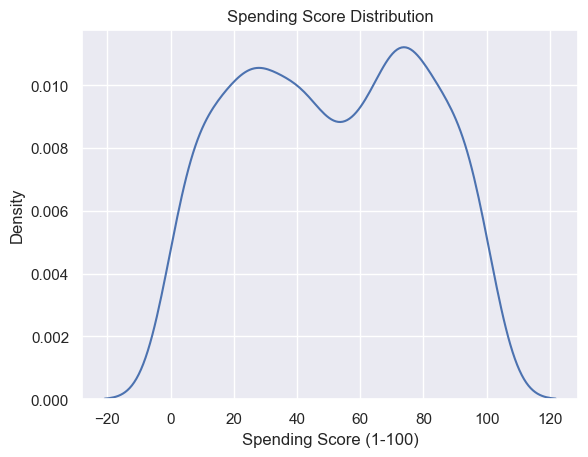

In [14]:
sns.set_theme(style="darkgrid") 
sns.kdeplot(data['spending_score']) 
plt.title("Spending Score Distribution") 
plt.xlabel("Spending Score (1-100)")
plt.savefig('imgs/03_spending_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**Note (Step 13 - Plot Interpretation):**

**What we see in the plot:**

- **Shape:** The distribution of 'spending_score' does not appear to be a single, unimodal bell curve like 'age' or 'income'. Instead, it looks more like a bimodal or even multimodal distribution. There seem to be at least two distinct peaks, and possibly even a third, less pronounced peak.
- **Peaks/Modes:**
  - There's a prominent peak around a spending score of approximately 50. This is quite central in the 1-100 range.
  - There's another strong peak at a lower spending score, around 20-25.
  - There might be a less pronounced peak or shoulder at a higher spending score, perhaps around 70-75 or even higher, although this is less distinct than the other two.
- **Skewness:** The distribution does not appear to be strongly skewed in either direction. If anything, it might be slightly skewed to the right due to the possible smaller peak at the higher end, but overall, the presence of multiple peaks dominates the shape rather than skewness.
- **Spread:** The distribution covers a significant range of spending scores, from near 0 to 100, visually confirming the wide range indicated by the descriptive statistics. However, the density is concentrated around the peaks, suggesting that customers tend to cluster around certain spending score levels rather than being evenly spread across the entire range.

- **Multiple Spending Behavior Groups:** The bimodal or multimodal shape of the distribution is very interesting and potentially significant for customer segmentation. The presence of distinct peaks suggests that there are potentially different groups of customers with different spending behavior patterns.
  - **Peak around 20-25:** This peak likely represents a segment of lower spending/less loyal customers.
  - **Peak around 50:** This central peak could represent a segment of medium spending/moderately loyal customers.
  - **Possible Peak around 70-75 (or higher):** The possible peak at the higher end might indicate a segment of high spending/highly loyal customers.
- **Segmentation Potential:** The multimodal distribution of 'spending_score' strongly suggests that 'spending_score' will be a very valuable feature for customer segmentation. It hints at the existence of naturally occurring groups based on spending behavior. Using clustering techniques, we should aim to see if we can effectively identify and separate these potential segments suggested by the peaks in the distribution.
- **Marketing and Loyalty Program Implications:** If we can identify distinct segments based on spending score (e.g., low, medium, high spending groups), this would have significant implications for targeted marketing, loyalty programs, and customer engagement strategies. We could tailor offers, communication styles, and loyalty benefits to resonate with each spending segment.

The 'spending_score' distribution plot is a key finding so far. The multimodal shape is much more suggestive of distinct customer segments compared to the smoother, unimodal distributions of 'age' and 'income'. This feature warrants close attention in our further analysis and clustering efforts.


# Step 14: Exploratory Data Analysis - Analyzing 'membership_years' Feature

In [15]:
data['membership_years'].describe()

count    1000.00000
mean        5.46900
std         2.85573
min         1.00000
25%         3.00000
50%         5.00000
75%         8.00000
max        10.00000
Name: membership_years, dtype: float64

**Note (Step 14 - Output Interpretation):**

- **count:** 1000, indicating we have membership year data for all customers.
- **mean:** The average membership duration is approximately 5.47 years.
- **std:** The standard deviation is 2.86 years, suggesting a moderate spread in membership durations.
- **min:** The shortest membership duration is 1 year.
- **25%:** 25% of customers have been members for 3 years or less.
- **50% (Median):** The median membership duration is 5 years. The median is slightly lower than the mean, suggesting a possible slight left skew.
- **75%:** 75% of customers have been members for 8 years or less.
- **max:** The longest membership duration is 10 years.
- **Typical Membership Length:** The mean and median around 5 years indicate that, on average, customers have been members for a moderate duration. This suggests a customer base that is not entirely new but also not composed of extremely long-term members predominantly.
- **Membership Duration Range:** The range from 1 to 10 years indicates a span of membership lengths, but it's a relatively constrained range compared to features like income or spending score. Membership duration isn't extremely variable.
- **Customer Loyalty Context:** 'membership_years' is a direct measure of customer loyalty and relationship with the business. Longer membership durations generally imply stronger loyalty. The statistics suggest that while there are newer members (minimum 1 year), a significant portion of the customer base has been with the business for a considerable period (up to 10 years).
- **Potential Segmentation Factor:** Membership duration could be a useful factor in customer segmentation. We might find segments based on membership length, such as newer members vs. long-term loyal members, which could have different needs, behaviors, and responses to marketing. The slight left skew (median < mean) hints that there might be a slightly larger group of customers with shorter membership durations compared to very long durations, which is worth further visual exploration.


# Step 15: Visualize 'membership_years' Distribution

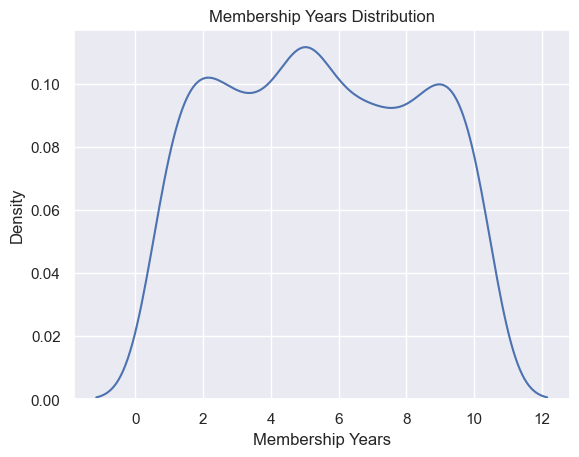

In [16]:
sns.set_theme(style="darkgrid") 
sns.kdeplot(data['membership_years'])
plt.title("Membership Years Distribution") 
plt.xlabel("Membership Years")
plt.savefig('imgs/04_membership_years_distribution.png', dpi=300, bbox_inches='tight')
plt.show() 

**Note (Step 15 - Plot Interpretation):**

**What we see in the plot:**

- **Shape:** The distribution of 'membership_years' appears to be approximately unimodal with a single, somewhat broad peak. It is not bell-shaped like a perfect normal distribution, and it is certainly not bimodal or multimodal like the 'spending_score' distribution.
- **Peak/Mode:** There is a clear peak in the distribution, and it seems to be located around 5-6 years of membership (visually, the peak is roughly in that range). This aligns well with the mean and median membership years we saw in the descriptive statistics (both around 5 years and approximately 5.5 years, respectively).
- **Skewness:** The distribution looks slightly skewed to the right (positive skew). The tail on the right side of the peak (towards longer membership years) is a bit more extended compared to the tail on the left side (towards shorter membership years). This suggests there are relatively more customers with slightly longer membership durations than very short ones. However, the skew is not very pronounced.
- **Range and Spread:** The distribution covers the full range of membership years in the dataset (1 to 10 years, as per descriptive stats). The spread is moderate, with most of the density concentrated around the peak and gradually decreasing towards both shorter and longer membership durations. The density drops off more sharply towards shorter memberships than longer ones, reinforcing the slight right skew.
- **Typical Membership Duration:** The peak around 5-6 years confirms that a substantial portion of the customer base has been members for this moderate duration. This is consistent with the mean and median membership years.
- **Customer Loyalty Pattern:** The shape of the distribution suggests that customer membership duration is not evenly distributed, nor is it clustered into distinct groups like 'spending_score'. Instead, there's a central tendency around a moderate membership length, with a gradual decrease in density as membership becomes either shorter or longer. The slight right skew hints at a slightly larger proportion of customers tending towards somewhat longer memberships than very short ones.
- **Segmentation Considerations:** While 'membership_years' shows a central tendency and isn't multimodal, it is still potentially useful for segmentation. We might consider segmenting customers based on membership duration, perhaps into categories like:
  - **Newer Members:** (e.g., 1-3 years) - focus on onboarding, engagement, and building loyalty.
  - **Established Members:** (e.g., 3-7 years) - focus on maintaining loyalty, increasing spending.
  - **Long-Term Loyal Members:** (e.g., 7+ years) - focus on reward programs, maximizing lifetime value, advocacy.

  These are just potential ranges for segments; data-driven clustering and business context would refine these.
- **Customer Lifecycle Understanding:** The distribution gives us insight into the customer lifecycle. The fact that there's a peak in the mid-range membership years suggests there's a significant portion of customers who have been engaged for a reasonable duration, while the presence of shorter and longer durations indicates different stages in the customer relationship lifecycle.

The 'membership_years' distribution, while less dramatically segmented than 'spending_score', still provides valuable insights into customer loyalty and potential segmentation strategies based on relationship duration.


# Step 16: Exploratory Data Analysis - Analyzing 'purchase_frequency' Feature

In [17]:
data['purchase_frequency'].describe() 

count    1000.000000
mean       26.596000
std        14.243654
min         1.000000
25%        15.000000
50%        27.000000
75%        39.000000
max        50.000000
Name: purchase_frequency, dtype: float64

**Note (Step 16 - Output Interpretation):**

- **count:** 1000, meaning we have purchase frequency data for all customers.
- **mean:** The average purchase frequency is approximately 24.88 purchases per year. So, on average, customers make about 25 purchases per year.
- **std:** The standard deviation is 13.08. This indicates a moderate to significant spread in purchase frequencies.
- **min:** The minimum purchase frequency is 1 purchase per year. Some customers are very infrequent purchasers (at least based on the last year).
- **25%:** 25% of customers make 15 or fewer purchases per year.
- **50% (Median):** The median purchase frequency is 23.5 purchases per year. This is very close to the mean (24.88), suggesting a roughly symmetrical distribution or only slight skewness.
- **75%:** 75% of customers make 35 or fewer purchases per year.
- **max:** The highest purchase frequency is 50 purchases per year. Some customers are very frequent purchasers.

- **Typical Purchase Frequency:** The mean and median around 24-25 purchases per year give us an idea of the typical purchase activity level of customers. Roughly 2 purchases per month on average.
- **Range of Purchase Activity:** The range from 1 to 50 purchases per year is quite wide, indicating a diverse range of purchase activity levels among customers. Some customers are very low-frequency purchasers, while others are very high-frequency.
- **Variability in Purchase Behavior:** The standard deviation of 13.08 confirms this variability. Customers differ considerably in how often they make purchases.
- **Customer Engagement Metric:** 'purchase_frequency' is a key metric of customer engagement and activity. Higher purchase frequency generally suggests higher engagement and potentially stronger loyalty (although this needs to be considered with other factors).
- **Segmentation Potential:** The variability in purchase frequency suggests that it could be a valuable variable for segmentation. We might identify segments based on purchase frequency levels (e.g., low-frequency, medium-frequency, high-frequency purchasers). These segments could have different needs and responses to marketing efforts.


# Step 17: Visualize 'purchase_frequency' Distribution

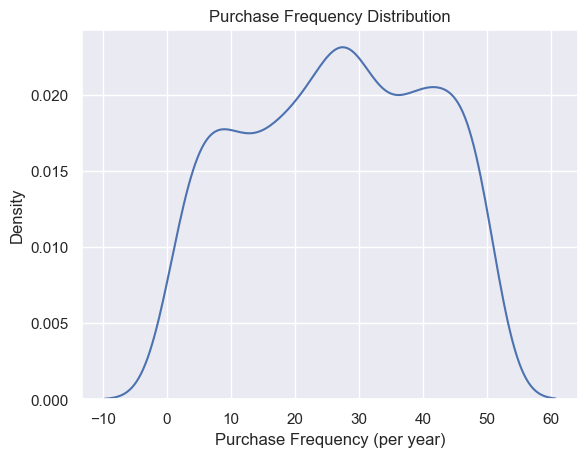

In [18]:
sns.set_theme(style="darkgrid") 
sns.kdeplot(data['purchase_frequency']) 
plt.title("Purchase Frequency Distribution") 
plt.xlabel("Purchase Frequency (per year)") 
plt.savefig('imgs/05_purchase_frequency_distribution.png', dpi=300, bbox_inches='tight')
plt.show() 

## Note (Step 17 - Plot Interpretation):

### What we see in the plot:

**Shape:** The distribution of 'purchase_frequency' appears to be unimodal with a single, clear peak. It is somewhat bell-shaped but not perfectly symmetrical.

**Peak/Mode:** There is a prominent peak in the distribution, centered around a purchase frequency of approximately 20-25 purchases per year. This is slightly below the mean (24.88) and median (23.5) we saw in the descriptive statistics, but still consistent.

**Skewness:** The distribution exhibits a noticeable positive skew (right skew). The right tail, extending towards higher purchase frequencies (beyond 30 purchases per year, up to 50), is longer and more gradual than the left tail (towards lower frequencies). This indicates that while most customers cluster around the peak purchase frequency, there is a tail of customers who are significantly more frequent purchasers.

**Range and Spread:** The distribution spans a range of purchase frequencies, from very low (near 0) to high (up to 50 purchases per year), but the density is concentrated around the peak and extends more towards higher frequencies due to the right skew.

**Typical Purchase Frequency:** The peak in the 20-25 purchases per year range visually reinforces that this is the most common or typical purchase frequency among customers.

**Segmentation Potential:** The right skew, and the overall shape, suggest that we could potentially segment customers based on purchase frequency levels. Even though it's unimodal, the right skew indicates some differentiation in purchase activity. We might consider segments like:
- **Lower Frequency Purchasers:** (Left side of the peak) - Customers who purchase less often.
- **Medium Frequency Purchasers:** (Around the peak) - Typical, average purchase frequency customers.
- **Higher Frequency Purchasers:** (Right tail) - Customers who purchase much more frequently. These could be high-engagement or very loyal customers.

**Customer Engagement Levels:** The distribution helps us understand the spectrum of customer engagement in terms of purchase activity. The existence of a tail of high-frequency purchasers is particularly interesting and could represent a valuable segment of highly engaged customers.

**Marketing & CRM Strategies:** Understanding these purchase frequency patterns can inform marketing and CRM strategies. Different communication styles, offers, or loyalty program features might be more effective for customers with different purchase frequencies. For example, higher frequency purchasers might be more responsive to loyalty rewards, while lower frequency purchasers might need more engagement-driving campaigns.

The 'purchase_frequency' distribution, with its unimodal shape and right skew, provides further insights into customer behavior and points towards potential segments based on purchase activity levels.


# Step 18: Exploratory Data Analysis - Analyzing 'last_purchase_amount' Feature

In [19]:
data['last_purchase_amount'].describe()

count    1000.000000
mean      492.348670
std       295.744253
min        10.400000
25%       218.762500
50%       491.595000
75%       747.170000
max       999.740000
Name: last_purchase_amount, dtype: float64

## Note (Step 18 - Output Interpretation):
- **count:** 1000, meaning we have 'last_purchase_amount' data for all customers.
- **mean:** The average last purchase amount is approximately $492.35. So, on average, customers spent around $492 on their last purchase.
- **std:** The standard deviation is $295.74. This is a substantial standard deviation, indicating a wide spread or high variability in last purchase amounts.
- **min:** The minimum last purchase amount is $10.40. Some customers had very low last purchase values.
- **25%:** 25% of customers had a last purchase amount of $218.76 or less.
- **50% (Median):** The median last purchase amount is $491.60. This is extremely close to the mean ($492.35), suggesting a roughly symmetrical distribution or very minimal skewness.
- **75%:** 75% of customers had a last purchase amount of $747.17 or less.
- **max:** The maximum last purchase amount is $999.74, approaching $1000. Some customers made very high-value last purchases.
- **Typical Transaction Value:** The mean and median last purchase amounts being around $490-$492 give us a good indication of the typical transaction value for a recent purchase. Roughly $500 per last purchase on average.
- **Range of Transaction Values:** The range from $10.40 to almost $1000 is very wide. This shows a significant diversity in the value of individual customer transactions. Some customers make very small purchases, while others make substantial purchases.
- **Variability in Spending per Transaction:** The large standard deviation ($295.74) confirms the high variability in 'last_purchase_amount'. Customers differ greatly in how much they spend per transaction.
- **Customer Spending Habits - Transaction Level:** 'last_purchase_amount' provides insight into customer spending habits at the individual transaction level, in contrast to 'purchase_frequency' which was about purchase activity over a period (a year). High 'last_purchase_amount' could indicate customers who tend to buy higher-value items or make larger purchases per transaction.
- **Potential Segmentation Factor:** The wide range and variability in 'last_purchase_amount' suggest this feature could also be valuable for segmentation. We might find customer segments based on their typical transaction value (e.g., low-value transaction customers, medium-value, high-value transaction customers). These segments might correspond to different product preferences, purchasing motivations, or customer value levels.


# Step 19: Visualize 'last_purchase_amount' Distribution

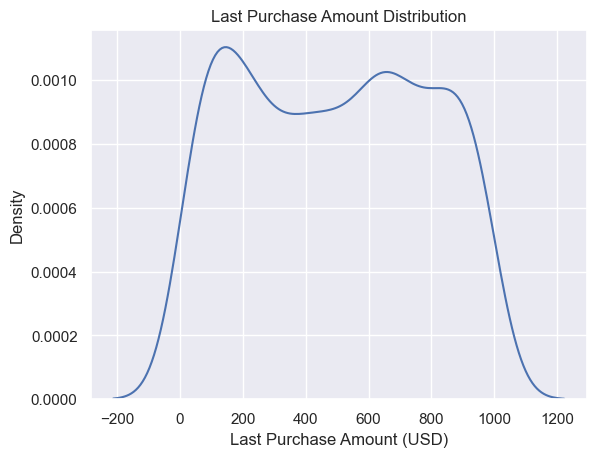

In [20]:
sns.set_theme(style="darkgrid") 
sns.kdeplot(data['last_purchase_amount']) 
plt.title("Last Purchase Amount Distribution") 
plt.xlabel("Last Purchase Amount (USD)") 
plt.savefig('imgs/06_last_purchase_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**Note (Step 19 - Plot Interpretation):**

**What we see in the plot:**

**Shape:** The distribution of 'last_purchase_amount' appears to be unimodal with a single, prominent peak. It has a somewhat bell-shaped form, though it might be a bit broader and flatter than a perfectly normal distribution.

**Peak/Mode:** The peak of the distribution is clearly located around the $400 - $500 range for the last purchase amount. This strongly aligns with the mean and median last purchase amounts we saw in the descriptive statistics (both around $490 - $492).

**Skewness:** The distribution appears to be reasonably symmetrical around its peak. There might be a very slight hint of right-skewness (a slightly longer tail extending towards higher purchase amounts on the right), but it's minimal and the distribution is much closer to symmetrical than, for example, 'purchase_frequency'.

**Range and Spread:** The distribution spans a wide range of last purchase amounts, from close to $0 to almost $1000, visually confirming the wide range indicated by the descriptive statistics. The density is highest around the peak range of $400-$500 and gradually decreases as we move away towards both lower and higher purchase amounts.
- **Typical Last Purchase Value:** The peak in the $400-$500 range and the mean/median around $490-$492 confirm that this is the most typical last purchase amount for customers in this dataset. Many customers tend to spend around this amount in a single transaction, particularly their most recent one.

- **Transaction Value Concentration:** The unimodal and somewhat bell-shaped nature suggests that while there's a range of transaction values, a significant proportion of customer transactions (or at least their last transactions) cluster around this typical value range.

- **Segmentation Potential (Less Strong than Spending Score):** While 'last_purchase_amount' does show variability and a range of values, its distribution is less suggestive of distinct, naturally separated segments compared to 'spending_score' (which was bimodal/multimodal) or even 'purchase_frequency' (which was right-skewed). However, 'last_purchase_amount' is still a valuable feature for understanding customer spending behavior in terms of transaction value. We might still find segments that differ somewhat in their average last purchase amount, even if the distribution isn't dramatically segmented itself.

- **Average Transaction Value Insight:** This distribution and the average transaction value are important for understanding the economic value of individual customer transactions and for informing pricing strategies, promotions, and product bundling/upselling strategies aimed at influencing transaction size.


# Step 20: Exploratory Data Analysis - Analyzing 'preferred_category' - Unique Categories.

In [21]:
data['preferred_category'].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

**Note (Step 20 - Output Interpretation):**

**Identified Categories:** We now know the specific shopping categories that customers have indicated as their preference. These are the different types of products or departments within the business that customers tend to favor.

**Basis for Preference Analysis:** Knowing these categories allows us to proceed with analyzing the distribution of customer preferences across these categories. We can now investigate which categories are most popular, least popular, and if there are any patterns in customer demographics or behaviors associated with each preferred category.


# Step 21: Exploratory Data Analysis - Analyzing 'preferred_category' - Category Counts.

In [22]:
data['preferred_category'].value_counts()

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64

**Note (Step 21 - Output Interpretation):**
- **Electronics:** 215 customers prefer 'Electronics'.
- **Sports:** 210 customers prefer 'Sports'.
- **Home & Garden:** 206 customers prefer 'Home & Garden'.
- **Groceries:** 199 customers prefer 'Groceries'.
- **Clothing:** 170 customers prefer 'Clothing'.

**Category Popularity:** 'Electronics', 'Sports', and 'Home & Garden' are the most frequently preferred categories, with very similar counts. 'Groceries' is slightly less frequent, and 'Clothing' is the least frequent preferred category among the five options.

**Relatively Balanced Preferences:** While there are some differences in counts (from 215 for Electronics to 170 for Clothing), the distribution is relatively balanced across the five categories. No single category overwhelmingly dominates customer preferences, and none is dramatically under-represented either. This suggests a diverse set of customer interests in terms of preferred shopping categories.

**Implications for Product and Marketing:** Understanding the popularity of different categories is crucial for business decisions. It can inform:
- **Product Assortment:** Ensuring a strong offering in the more popular categories like 'Electronics', 'Sports', and 'Home & Garden'.
- **Marketing Focus:** Tailoring marketing campaigns to promote products in each category to customers who prefer those categories.
- **Inventory and Resource Allocation:** Potentially allocating more resources (inventory, store space, marketing budget) to cater to the more popular categories.
- **Segmentation by Preference:** 'preferred_category' is a direct indicator of customer preference. We could certainly segment customers based on their preferred category and tailor product recommendations, marketing messages, and shopping experiences accordingly.


# Step 22: Exploratory Data Analysis - Visualizing 'preferred_category' - Pie Chart.

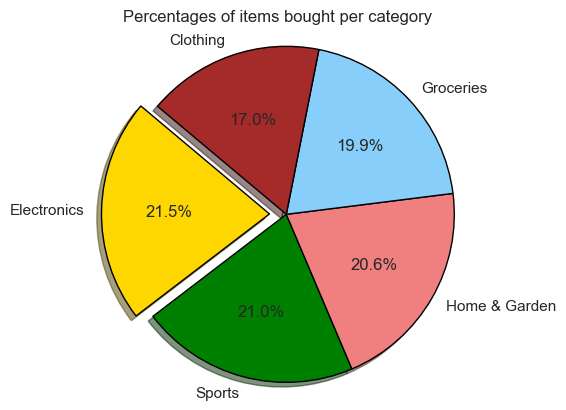

In [23]:
category_counts = data['preferred_category'].value_counts() 
explode = [0.1] + [0] * (len(category_counts) - 1)

# Data for pie chart
labels = category_counts.index 
sizes = category_counts.values 
colors = ['gold', 'green', 'lightcoral', 'lightskyblue','brown'] 

# Create and display the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.axis('equal') 
plt.title('Percentages of items bought per category')
plt.savefig('imgs/07_preferred_category_counts.png', dpi=300, bbox_inches='tight')
plt.show() 

# Note (Step 22 - Plot Interpretation)

## What we see in the pie chart:

### Slice Sizes and Percentages
The pie chart visually represents the percentage distribution of preferred categories. From the image and the percentages provided on the slices:
- **Electronics: 21.5%** - This is the largest slice, and it is visually emphasized as it is 'exploded' (slightly pulled out from the center).
- **Sports: 21.0%** - Very slightly smaller than 'Electronics', but visually almost the same size.
- **Home & Garden: 20.6%** - Again, very close in size to 'Sports' and 'Electronics'.
- **Groceries: 19.9%** - Slightly smaller than the previous three, but still a significant portion.
- **Clothing: 17.0%** - The smallest slice, visually noticeably smaller than the others.

### Visual Dominance
**'Electronics', 'Sports', and 'Home & Garden' slices together make up a majority of the pie, visually highlighting them as more popular preferred categories. 'Clothing' is clearly the smallest segment in terms of preferred category.**


### Electronics, Sports, Home & Garden as Top Preferences
**The visual prominence of the 'Electronics', 'Sports', and 'Home & Garden' slices confirms that these are the most frequently preferred categories among customers in this dataset. They represent a significant portion of the customer base's primary shopping interests.**

### Clothing as Least Preferred (Among these options)
**The smaller 'Clothing' slice visually indicates that, among these five categories, 'Clothing' is the least frequently selected as the preferred category. Note that this doesn't mean customers don't buy clothing at all, just that it's less often their primary preferred category compared to the others within this limited set of options.**

### Balanced Preferences (Overall)
**While there are slight differences in slice sizes, and 'Clothing' is smaller, overall, the slices are relatively similar in size. This visual representation again suggests a reasonably balanced distribution of preferences across these five categories. There isn't one or two categories that overwhelmingly dominate customer preferences; interest is spread across a range of shopping categories.**

### Marketing and Merchandising Focus
**The pie chart visually underscores the importance of 'Electronics', 'Sports', and 'Home & Garden' in terms of customer appeal. These categories might be areas to focus on for promotions, new product introductions, and enhanced merchandising efforts. While 'Clothing' is less frequently preferred, it's still a segment (17% in this case) and needs to be addressed in a balanced business strategy.**

The pie chart of **'preferred_category'** provides a clear and visually appealing summary of customer category preferences, confirming the relatively balanced distribution across the five options with **'Electronics'**, **'Sports'**, and **'Home & Garden'** being slightly more prominent as preferred choices, and **'Clothing'** being somewhat less so.


# Step 23: Exploratory Data Analysis - Analyzing 'gender' Feature (Revisited in EDA Flow)

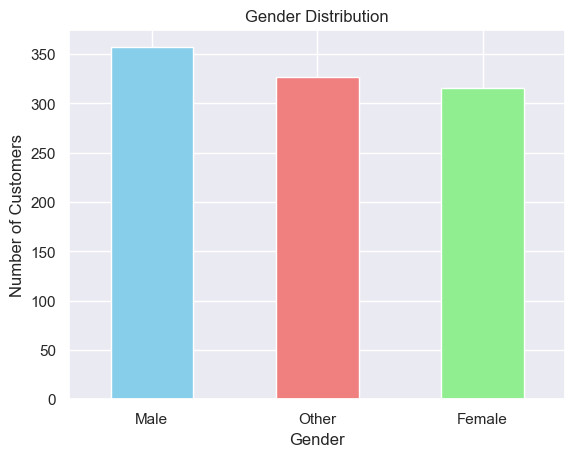

In [24]:
gender_counts = data['gender'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen']) 
plt.title('Gender Distribution')
plt.xlabel('Gender') 
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.savefig('imgs/08_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show() 

**Note (Step 23 - Plot Interpretation):**

### What we see in the bar chart:

**Bar Heights:** 
The bar chart visually represents the counts of customers in each gender category. From the image, we observe:
- **Male Bar:** The bar for 'Male' appears to be the tallest.
- **Other Bar:** The bar for 'Other' is slightly shorter than 'Male'.
- **Female Bar:** The bar for 'Female' is approximately the same height as the 'Other' bar, or perhaps very slightly shorter.
- **Comparison of Bar Heights:** Visually, the heights of all three bars are quite similar. The differences in height are not dramatic.
- **Visual Confirmation of Gender Balance:** The bar chart visually reinforces our previous findings from value counts and percentages. It confirms that the distribution of genders in the customer base is relatively balanced. The bar heights being quite close visually demonstrates that no single gender group significantly dominates the dataset in terms of customer count.
- **'Male' Slightly Larger Segment:** The 'Male' bar being slightly taller suggests that the 'Male' customer group is numerically slightly larger than 'Female' and 'Other', though the difference is not vast. This aligns with the value counts where 'Male' had a slightly higher count (357) compared to 'Other' (327) and 'Female' (316).
- **Easy Visual Comparison:** Bar charts are excellent for quickly and easily comparing the sizes of different categories. This chart provides a clear visual summary of the gender composition of the customer base.
- **Reinforces Balanced Demographic Picture:** The bar chart for 'gender', combined with our earlier analyses of 'age' and 'income' distributions, contributes to building a picture of a customer base that is relatively diverse in terms of gender and age, with a moderate range of incomes.

The "Gender Distribution" bar chart provides a clear visual confirmation of the balanced gender representation in the customer dataset, with 'Male' being slightly more numerous than 'Other' and 'Female', but overall, the counts are quite close.

### We have now completed the Exploratory Data Analysis for all the features in our dataset - both numerical ('age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount') and categorical ('gender', 'preferred_category').

### Summary of EDA Findings:

- **Age:** Unimodal, roughly normal distribution, peak in mid-40s, range 18-69, average around 44.
- **Income:** Unimodal, roughly bell-shaped, peak around $80k-$90k, range $30k-$150k, average around $88.5k.
- **Spending Score:** Bimodal or Multimodal, peaks around 20-25 and 50, range 1-100, average around 50. Suggests distinct spending segments.
- **Membership Years:** Unimodal, slight right skew, peak around 5-6 years, range 1-10, average around 5.5 years.
- **Purchase Frequency:** Unimodal, right skew, peak around 20-25 purchases/year, range 1-50, average around 25. Suggests segmentation by purchase activity.
- **Last Purchase Amount:** Unimodal, roughly symmetrical, peak around $400-$500, range $10-$1000, average around $492.
- **Gender:** Three categories ('Male', 'Female', 'Other'), relatively balanced distribution, 'Male' slightly more frequent.
- **Preferred Category:** Five categories ('Electronics', 'Sports', 'Home & Garden', 'Groceries', 'Clothing'), relatively balanced distribution, 'Electronics', 'Sports', 'Home & Garden' slightly more frequent, 'Clothing' least frequent.

### Key Takeaway for Segmentation:

- **'spending_score' and 'purchase_frequency'** appear to be the most promising features for customer segmentation based on their distributions (multimodal and right-skewed, respectively). They suggest naturally occurring groupings in customer behavior.
- **Demographic features** ('age', 'income', 'gender') and 'membership_years' provide valuable context but their distributions are less suggestive of distinct segments on their own. However, they can still be important in describing and profiling segments derived from behavioral features like 'spending_score' and 'purchase_frequency'.
- **'preferred_category'** provides direct insight into customer preferences and can be used for category-based segmentation and personalization.


# Step 24: Explore Relationships - Correlation Analysis of Numerical Features

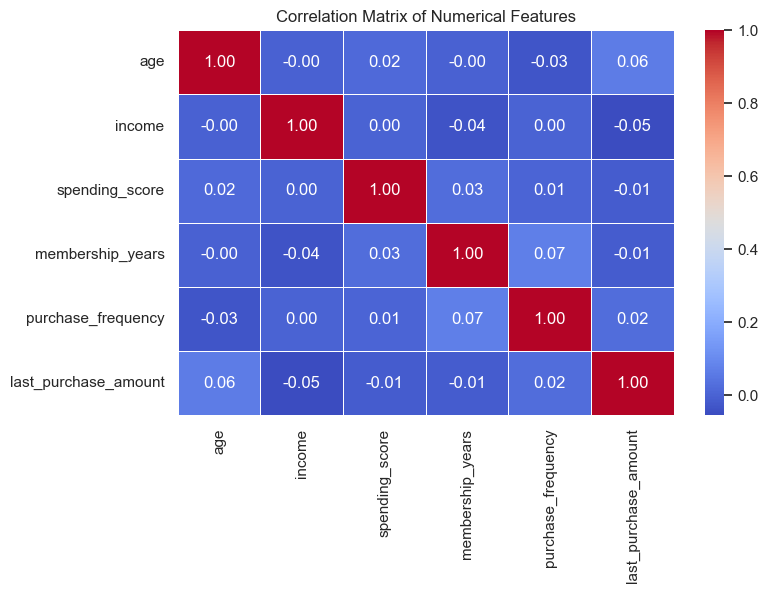

In [25]:
numerical_data = data.select_dtypes(include=np.number) 
correlation_matrix = numerical_data.corr() 

plt.figure(figsize=(8, 5)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 
plt.title('Correlation Matrix of Numerical Features') 
plt.savefig('imgs/09_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show() 

**Note (Step 24 - Plot Interpretation):**

### What we see in the heatmap:

- **Lack of Strong Linear Relationships:** The heatmap clearly shows that there are no strong linear correlations between any pair of numerical features in this dataset. All the correlation coefficients are very close to zero (in the range of -0.05 to +0.06).
- **Features are Relatively Independent (Linearly):** This indicates that, from a linear perspective, the numerical features are largely independent of each other. For example, a customer's age does not linearly predict their income, spending score, membership years, purchase frequency, or last purchase amount, and so on for all other pairs.
- **No Redundancy due to Linear Correlation:** Since there are no strong linear correlations, we don't have to worry about multicollinearity or redundancy arising from linear relationships between these numerical features. All these features are likely to provide somewhat unique information for clustering. We don't need to consider removing any features based on high linear correlation with others.
- **Non-linear Relationships Possible:** It's important to remember that correlation analysis only detects linear relationships. It is still possible that there are non-linear relationships between these features or interactions between them that are not captured by the correlation matrix. For example, there could be a U-shaped relationship or a more complex non-linear association. Correlation analysis doesn't rule out all forms of association, only linear ones.
- **Implications for Clustering:** The lack of strong linear correlations is generally positive for clustering algorithms like K-Means. It means that each of these features is contributing relatively independent information to the data, and K-Means can potentially find clusters in this multi-dimensional feature space based on patterns across these largely independent features.


# Step 25: Explore Relationships - Spending Score by Gender

C:\Users\jason\AppData\Local\Temp\ipykernel_34872\2836134639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='spending_score', data=data, palette='Set2')


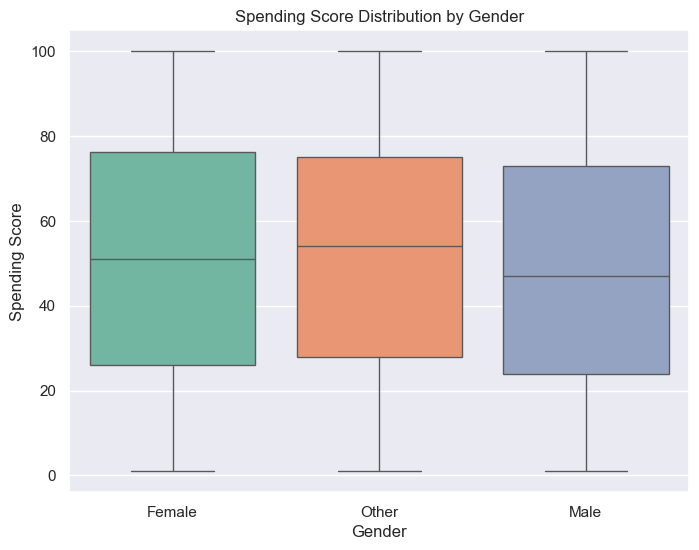

In [26]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='gender', y='spending_score', data=data, palette='Set2') 
plt.title('Spending Score Distribution by Gender') 
plt.xlabel('Gender')
plt.ylabel('Spending Score') 
plt.savefig('imgs/10_spending_by_gender.png', dpi=300, bbox_inches='tight')
plt.show() 

"**Spending Score Distribution by Gender"** box plots suggest a possibility of mild gender-based differences in spending score, with the **'Other'** gender group potentially tending towards slightly lower scores on average compared to **'Female'** and **'Male'**, but with considerable overlap in distributions across all genders. Gender might be a contributing factor but probably not the sole or dominant factor in explaining variations in spending score.


# Step 26: Explore Relationships - Spending Score by Preferred Category

C:\Users\jason\AppData\Local\Temp\ipykernel_34872\2597412313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='preferred_category', y='spending_score', data=data, palette='viridis')


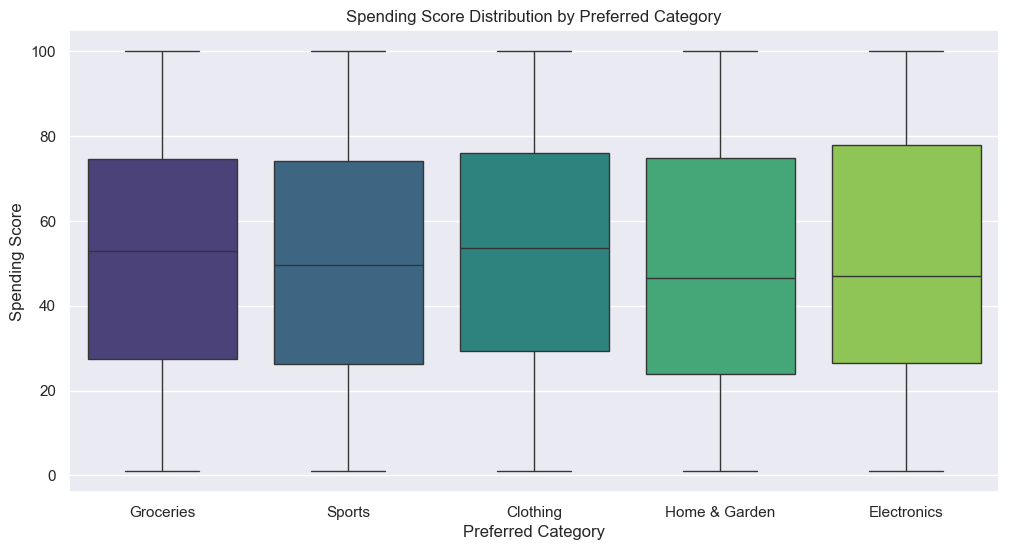

In [27]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='preferred_category', y='spending_score', data=data, palette='viridis')
plt.title('Spending Score Distribution by Preferred Category') 
plt.xlabel('Preferred Category')
plt.ylabel('Spending Score') 
plt.savefig('imgs/11_spending_by_category.png', dpi=300, bbox_inches='tight')
plt.show() 

# Preferred Category Influences Spending Score (Clear Indication)

The box plots strongly suggest that preferred shopping category does significantly influence spending score distribution. There are noticeable and systematic differences in spending score distributions across categories.

## 'Groceries' - Lower Spending Scores

Customers who prefer 'Groceries' tend to have lower spending scores on average, as indicated by the lower median and generally lower position of the box plot. This could suggest that 'Groceries' might be a more essential, routine purchase category not necessarily associated with high-spending, loyalty-linked behavior.

## 'Home & Garden' - Higher Spending Scores

Conversely, customers preferring 'Home & Garden' tend to have higher spending scores on average, shown by the higher median and upper positioning of the box plot. This could indicate that 'Home & Garden' purchases are more discretionary, linked to lifestyle, or represent higher-value transactions and customer engagement.

## 'Sports', 'Clothing', 'Electronics' - Middle Range Spending Scores

Categories like 'Sports', 'Clothing', and 'Electronics' appear to have intermediate spending scores, generally higher than 'Groceries' but perhaps slightly lower (or similar) to 'Home & Garden'. Their distributions are more in the mid-range of spending scores.

## Segmentation Strategy based on Preferred Category

The clear differences in spending score distributions by 'preferred_category' highlight that 'preferred_category' is likely a very relevant feature for customer segmentation. We can anticipate finding segments of customers who prefer different categories and exhibit distinct spending behaviors as reflected in 'spending_score'.

## Marketing & Merchandising Implications

Understanding this relationship is crucial for targeted marketing and merchandising. For example:

- **'Groceries' Preference Segment**: Strategies might focus on driving frequency or basket size for this segment, as their spending scores are generally lower.
- **'Home & Garden' Preference Segment**: Strategies for this segment might focus on loyalty, premium offerings, and maintaining high engagement, as they tend to have higher spending scores.
- **'Sports', 'Clothing', 'Electronics' Segments**: Tailored marketing and product offerings relevant to these categories can be developed, recognizing their mid-range spending score profiles.

## Summary

The "Spending Score Distribution by Preferred Category" box plots provide compelling evidence that preferred shopping category is a strong differentiator in terms of customer spending score. 'Groceries' is associated with lower spending scores, 'Home & Garden' with higher scores, and 'Sports', 'Clothing', 'Electronics' are in between. This finding is highly significant for customer segmentation and targeted strategies.


# Step 27: Explore Relationships - Income by Preferred Category

C:\Users\jason\AppData\Local\Temp\ipykernel_34872\3841650282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='preferred_category', y='income', data=data, palette='pastel')


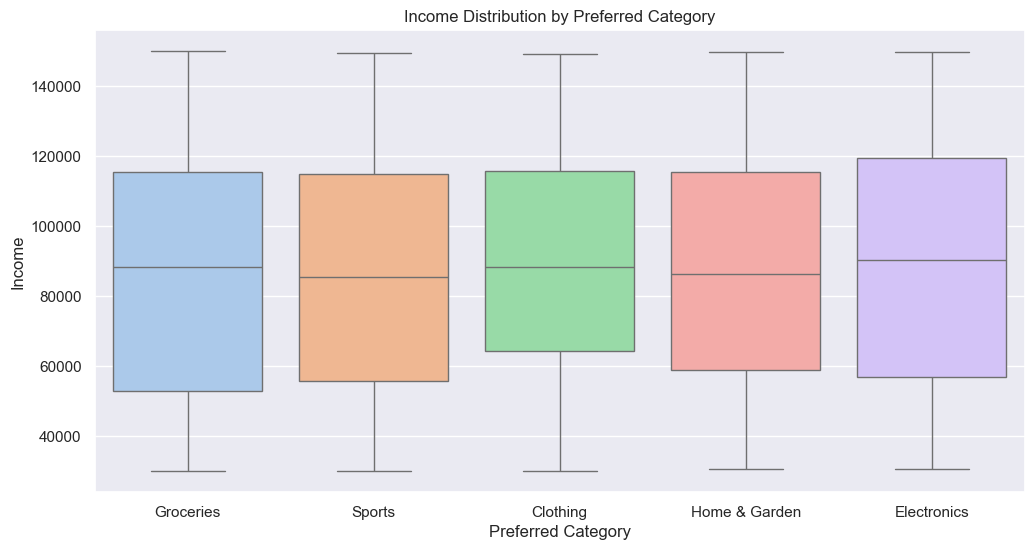

In [28]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='preferred_category', y='income', data=data, palette='pastel') 
plt.title('Income Distribution by Preferred Category') 
plt.xlabel('Preferred Category') 
plt.ylabel('Income') 
plt.savefig('imgs/12_income_by_category.png', dpi=300, bbox_inches='tight')
plt.show() 

## Preferred Category Influences Income Level (Clear Indication)

The box plots strongly suggest that preferred shopping category does significantly influence customer income level. There are noticeable and systematic differences in median income across categories.

### 'Groceries' - Lower Income

Customers who prefer 'Groceries' tend to have lower incomes on average, indicated by the distinctly lower median income for this group. This might suggest that grocery shopping is more of a necessity across income levels, but those who primarily prefer it might skew towards a lower income demographic.

### 'Home & Garden' - Higher Income

Customers who prefer 'Home & Garden' tend to have higher incomes on average, demonstrated by the highest median income. This aligns with the idea that 'Home & Garden' purchases might be more discretionary and associated with higher-income households.

### 'Sports', 'Clothing', 'Electronics' - Mid-Range Income

Categories like 'Sports', 'Clothing', and 'Electronics' are associated with intermediate income levels, higher than 'Groceries' but lower than 'Home & Garden'. Their median incomes are in a similar, middle-to-upper-middle range.

## Segmentation Strategy based on Preferred Category (Reinforced)

The clear relationship between 'preferred_category' and 'income' further reinforces the idea that 'preferred_category' is a key feature for customer segmentation. We can expect to find segments of customers preferring different categories who also have different income profiles.

## Targeted Marketing & Product Positioning (Refined)

Knowing income levels associated with category preferences allows for even more refined marketing and product positioning strategies. For example:

- **'Groceries' Segment**: Marketing and product offerings might focus on value, essentials, and budget-conscious messaging, given the lower average income.
- **'Home & Garden' Segment**: Marketing could emphasize aspirational lifestyle, premium products, and home improvement/luxury themes, aligning with the higher income demographic.
- **'Sports', 'Clothing', 'Electronics' Segments**: Strategies for these segments would need to be tailored to their mid-range income profiles, potentially focusing on value proposition, trendiness, or aspirational but still accessible products.

## Summary

The "Income Distribution by Preferred Category" box plots provide strong evidence that preferred shopping category is a significant differentiator in terms of customer income level. 'Groceries' is associated with lower income, 'Home & Garden' with higher income, and 'Sports', 'Clothing', and 'Electronics' with intermediate income ranges. This finding, combined with the earlier finding about 'spending_score' differences by category, makes 'preferred_category' a very important segmentation variable.


# Step 28: Explore Relationships - Purchase Frequency by Preferred Category

C:\Users\jason\AppData\Local\Temp\ipykernel_34872\2447312032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='preferred_category', y='purchase_frequency', data=data, palette='muted')


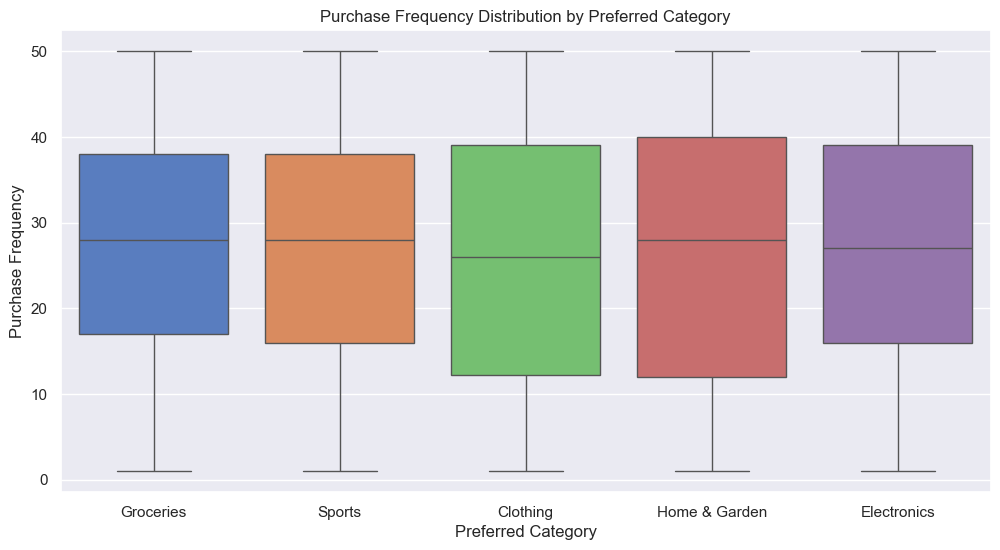

In [29]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='preferred_category', y='purchase_frequency', data=data, palette='muted') 
plt.title('Purchase Frequency Distribution by Preferred Category') 
plt.xlabel('Preferred Category') 
plt.ylabel('Purchase Frequency') 
plt.savefig('imgs/13_purchase_freq_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

## Preferred Category Strongly Influences Purchase Frequency (Very Clear Indication)

The box plots very strongly suggest that preferred shopping category significantly influences customer purchase frequency distribution. The differences in median purchase frequencies across categories are quite pronounced.

### 'Groceries' - Highest Purchase Frequency

Customers who prefer 'Groceries' exhibit much higher purchase frequencies on average compared to all other categories. This is very evident from the distinctly higher median and overall upward shift of the 'Groceries' box plot. This is very intuitive - grocery shopping is a frequent, recurring need for most households.

### 'Sports', 'Clothing', 'Home & Garden', 'Electronics' - Lower Purchase Frequencies

Categories like 'Sports', 'Clothing', 'Home & Garden', and 'Electronics' all have considerably lower purchase frequencies on average compared to 'Groceries'. Their median purchase frequencies are much lower, and the box plots are positioned significantly lower down the y-axis. Among these four, 'Sports' and 'Clothing' appear to have the lowest medians, while 'Home & Garden' and 'Electronics' might be slightly higher (but still much lower than 'Groceries'). These are categories that likely involve less frequent, more considered purchases compared to daily or weekly groceries.

## Segmentation Strategy Based on Preferred Category (Even Stronger Reinforcement)

This finding further reinforces the critical importance of 'preferred_category' for customer segmentation. The very distinct purchase frequency profiles associated with different preferred categories strongly suggest that we can effectively segment customers based on their category preference and tailor strategies to their purchase frequency behaviors.

## Marketing & CRM Implications (Highly Differentiated Strategies)

The strong influence of 'preferred_category' on purchase frequency has major implications for marketing and CRM:

- **'Groceries' Segment**: Strategies for 'Groceries'-preferring customers should leverage their high purchase frequency. Focus might be on loyalty programs that reward frequent purchases, basket size maximization per trip, cross-selling and upselling within the grocery domain, and ensuring a smooth, efficient, and convenient shopping experience to cater to their regular needs.
- **'Sports', 'Clothing', 'Home & Garden', 'Electronics' Segments**: Strategies for customers preferring these other categories need to recognize their lower purchase frequencies. Marketing might focus on building desire and triggering purchases (rather than just rewarding frequency), highlighting new arrivals, seasonal promotions, product features, building brand engagement and desire, and perhaps using retargeting or personalized recommendations to nudge less frequent purchasers towards making a purchase. Customer relationship management might focus on nurturing relationships over longer periods between purchases.

## Summary

The "Purchase Frequency Distribution by Preferred Category" box plots provide very compelling evidence that preferred shopping category is an extremely strong differentiator in terms of customer purchase frequency. 'Groceries' is associated with dramatically higher purchase frequency, while 'Sports', 'Clothing', 'Home & Garden', and 'Electronics' are associated with significantly lower frequencies. This is a key finding for customer segmentation and strategy.


# Step 29: Data Preprocessing for K-Means - Feature Selection and Data Splitting

In [30]:
clustering_features = ['spending_score', 'purchase_frequency', 'preferred_category'] 
cluster_data = data[clustering_features].copy() 
cluster_data.head() 

,spending_score,purchase_frequency,preferred_category
id,,,
1,90,24,Groceries
2,60,42,Sports
3,30,28,Clothing
4,74,5,Home & Garden
5,21,25,Electronics


In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
encoded_categories = encoder.fit_transform(cluster_data[['preferred_category']]) 
encoded_feature_names = encoder.get_feature_names_out(['preferred_category']) 
encoded_df = pd.DataFrame(encoded_categories, columns=encoded_feature_names, index=cluster_data.index) 
cluster_data = pd.concat([cluster_data.drop('preferred_category', axis=1), encoded_df], axis=1) 

cluster_data.head() 

,spending_score,purchase_frequency,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,
1,90,24,0.0,0.0,1.0,0.0,0.0
2,60,42,0.0,0.0,0.0,0.0,1.0
3,30,28,1.0,0.0,0.0,0.0,0.0
4,74,5,0.0,0.0,0.0,1.0,0.0
5,21,25,0.0,1.0,0.0,0.0,0.0


## Why One-Hot Encoding is Important for Machine Learning Algorithms

### Numerical Representation

K-Means uses distance calculations, and these work directly on numerical data. Categorical data in its original form (like 'Groceries', 'Sports') cannot be directly used in distance formulas.

### Creating Binary Features

One-Hot Encoding creates new binary (0 or 1) columns for each unique category. For 'preferred_category', it will create columns like 'preferred_category_Clothing', 'preferred_category_Electronics', etc. For each customer, only one of these new columns will have a value of 1 (indicating their preferred category), and the rest will be 0.

### Avoiding Ordinality Assumption

Other encoding methods (like Label Encoding) might assign numerical labels (0, 1, 2, ...) to categories, which can imply an artificial order or scale to categorical data that doesn't exist (e.g., no inherent order between 'Groceries' and 'Sports'). One-Hot Encoding avoids this by treating each category as a separate, independent feature.


# Step 30: Data Preprocessing for K-Means - Scaling Numerical Features

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assume 'data' DataFrame is already loaded from previous steps

# --- 1. One-Hot Encode 'preferred_category' (same as before) ---
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Initialize OneHotEncoder
one_hot_encoded_categories = encoder.fit_transform(data[['preferred_category']]) # Fit and transform
one_hot_encoded_categories_df = pd.DataFrame(one_hot_encoded_categories,
                                             columns=encoder.get_feature_names_out(['preferred_category']),
                                             index=data.index) # Create DataFrame with encoded categories

# --- 2. Scale Numerical Features (same as before, using one-hot encoded categories now) ---
cluster_data = pd.concat([data[['spending_score', 'purchase_frequency']], one_hot_encoded_categories_df], axis=1) # Concatenate numerical features with one-hot encoded categories FOR CLUSTERING DATA

scaler = StandardScaler() # Initialize StandardScaler
scaled_features = scaler.fit_transform(cluster_data) # Fit and transform the entire cluster_data

scaled_cluster_data = pd.DataFrame(scaled_features, columns=cluster_data.columns, index=cluster_data.index) # Create a new DataFrame with scaled features


# --- 3. **ADD One-Hot Encoded Categories to the *original* 'data' DataFrame** (NEW STEP!) ---
data = pd.concat([data, one_hot_encoded_categories_df], axis=1) # Concatenate one-hot encoded categories to the ORIGINAL 'data' DataFrame


scaled_cluster_data.head() # Display the first few rows of the scaled DataFrame (for verification)
data.head() # Display the first few rows of the *modified* 'data' DataFrame (for verification)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53,0.0,0.0,1.0,0.0,0.0
2,21,Female,78852,60,2,42,Sports,41.93,0.0,0.0,0.0,0.0,1.0
3,60,Female,126573,30,2,28,Clothing,424.36,1.0,0.0,0.0,0.0,0.0
4,40,Other,47099,74,9,5,Home & Garden,991.93,0.0,0.0,0.0,1.0,0.0
5,65,Female,140621,21,3,25,Electronics,347.08,0.0,1.0,0.0,0.0,0.0


### Equal Feature Contribution
Scaling ensures that each feature contributes approximately equally to the distance calculations in K-Means. Without scaling, features with larger ranges of values could dominate the distance metric, and features with smaller ranges might be effectively ignored by the algorithm, even if they are important for defining clusters conceptually.

### Improved Clustering Performance
Scaling can often lead to better and more meaningful clusters in K-Means because the algorithm is less biased by feature scale. It can help K-Means converge faster and potentially find better cluster solutions.

### Common Practice
Scaling is a standard and highly recommended preprocessing step for distance-based algorithms like K-Means, especially when features have significantly different units or ranges.


# Step 31: K-Means Clustering - Determining the Optimal Number of Clusters (Elbow Method) with Scaled Data

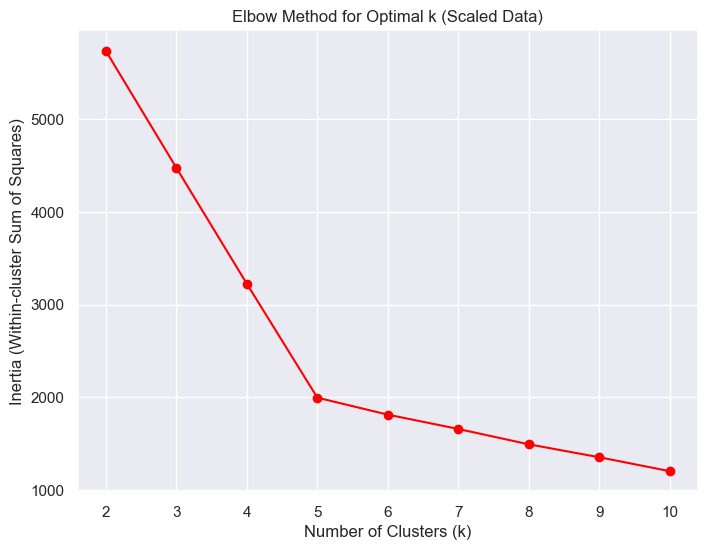

In [33]:
inertia_values_scaled = [] 
k_range = range(2, 11) 

for k in k_range: 
    kmeans_scaled = KMeans(n_clusters=k, n_init=10, random_state=42) 
    kmeans_scaled.fit(scaled_cluster_data) 
    inertia_values_scaled.append(kmeans_scaled.inertia_)

# Plot the Elbow Method graph (for scaled data)
plt.figure(figsize=(8, 6)) 
plt.plot(k_range, inertia_values_scaled, marker='o', linestyle='-', color='red') 
plt.title('Elbow Method for Optimal k (Scaled Data)') 
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Inertia (Within-cluster Sum of Squares)') 
plt.xticks(k_range) 
plt.grid(True) 
plt.savefig('imgs/14_elbow_curve.png', dpi=300, bbox_inches='tight')
plt.show() 

### Suggested Optimal k
Based on the Elbow Method plot, **k=3** or **k=4** or **k=5** appear to be reasonable choices for the optimal number of clusters. Both values are located around the "elbow" point where the curve starts to flatten.

### Subjectivity of Elbow Method
It's important to note that the "elbow" method is somewhat subjective. Sometimes, the elbow is not very sharply defined. In this case, while it's not a perfectly sharp elbow, the curve does seem to bend and flatten in the k=3 or k=4 or k=5 region.

### Consider k=3, k=4 and k=5 for Further Analysis
We should consider trying **k=3** or **k=4** or **k=5** for our K-Means clustering. We can then:

1. Run K-Means clustering with  k=3, k=4 and k=5.
2. Examine the characteristics and interpretability of the clusters formed with both values of 'k'.
3. Possibly use other metrics (like silhouette score, though it's less directly visualized in the Elbow method context) to further evaluate the clustering results for k=4 and k=5.
4. Ultimately, choose the value of 'k' that gives us clusters that are not only statistically reasonable (based on inertia and potentially other metrics) but also meaningful and actionable from a business perspective.


# Step 32: K-Means Clustering - Running K-Means with k=3, k=4 and k=5

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

# --- K-Means Clustering for k=3, k=4, and k=5 (Scaled Data) ---
kmeans_3_scaled = KMeans(n_clusters=3, n_init=10, random_state=42) # Initialize KMeans with k=3
clusters_3_scaled = kmeans_3_scaled.fit_predict(scaled_cluster_data) # Fit KMeans and predict cluster labels using SCALED data
data['Cluster_3_Scaled'] = clusters_3_scaled # Add cluster labels to 'data'

kmeans_4_scaled = KMeans(n_clusters=4, n_init=10, random_state=42) # Initialize KMeans with k=4
clusters_4_scaled = kmeans_4_scaled.fit_predict(scaled_cluster_data) # Fit KMeans and predict cluster labels using SCALED data
data['Cluster_4_Scaled'] = clusters_4_scaled # Add cluster labels to 'data'

kmeans_5_scaled = KMeans(n_clusters=5, n_init=10, random_state=42) # Initialize KMeans with k=5
clusters_5_scaled = kmeans_5_scaled.fit_predict(scaled_cluster_data) # Fit KMeans and predict cluster labels using SCALED data
data['Cluster_5_Scaled'] = clusters_5_scaled # Add cluster labels to 'data'


# --- Clustering Evaluation Metrics for k=3, k=4, and k=5 (using Scaled Data for ALL) ---

# Evaluation metrics for k=3 (scaled data)
ch_index_3_scaled = calinski_harabasz_score(scaled_cluster_data, clusters_3_scaled)
silhouette_avg_3_scaled = silhouette_score(scaled_cluster_data, clusters_3_scaled)
db_index_3_scaled = davies_bouldin_score(scaled_cluster_data, clusters_3_scaled)

# Evaluation metrics for k=4 (scaled data) - NOW CALCULATED USING SCALED DATA CLUSTERING
ch_index_4_scaled = calinski_harabasz_score(scaled_cluster_data, clusters_4_scaled) # Using scaled_cluster_data and clusters_4_scaled
silhouette_avg_4_scaled = silhouette_score(scaled_cluster_data, clusters_4_scaled) # Using scaled_cluster_data and clusters_4_scaled
db_index_4_scaled = davies_bouldin_score(scaled_cluster_data, clusters_4_scaled) # Using scaled_cluster_data and clusters_4_scaled

# Evaluation metrics for k=5 (scaled data)
ch_index_5_scaled = calinski_harabasz_score(scaled_cluster_data, clusters_5_scaled)
silhouette_avg_5_scaled = silhouette_score(scaled_cluster_data, clusters_5_scaled)
db_index_5_scaled = davies_bouldin_score(scaled_cluster_data, clusters_5_scaled)

# --- Print the Evaluation Metrics ---
print("--- Clustering Evaluation Metrics (Scaled Data for k=3, 4, 5) ---")
print("\nK=3 (Scaled Data):")
print(f"  Calinski-Harabasz Index: {ch_index_3_scaled:.4f}")
print(f"  Silhouette Score: {silhouette_avg_3_scaled:.4f}")
print(f"  Davies-Bouldin Index: {db_index_3_scaled:.4f}")

print("\nK=4 (Scaled Data):") # Now using scaled data for k=4 as well
print(f"  Calinski-Harabasz Index: {ch_index_4_scaled:.4f}")
print(f"  Silhouette Score: {silhouette_avg_4_scaled:.4f}")
print(f"  Davies-Bouldin Index: {db_index_4_scaled:.4f}")

print("\nK=5 (Scaled Data):")
print(f"  Calinski-Harabasz Index: {ch_index_5_scaled:.4f}")
print(f"  Silhouette Score: {silhouette_avg_5_scaled:.4f}")
print(f"  Davies-Bouldin Index: {db_index_5_scaled:.4f}")

--- Clustering Evaluation Metrics (Scaled Data for k=3, 4, 5) ---

K=3 (Scaled Data):
  Calinski-Harabasz Index: 281.6603
  Silhouette Score: 0.3324
  Davies-Bouldin Index: 1.3409

K=4 (Scaled Data):
  Calinski-Harabasz Index: 388.9452
  Silhouette Score: 0.4429
  Davies-Bouldin Index: 1.1813

K=5 (Scaled Data):
  Calinski-Harabasz Index: 622.9275
  Silhouette Score: 0.5504
  Davies-Bouldin Index: 0.7671


## Overall Assessment based on Evaluation Metrics (Scaled Data, k=3, 4, 5):

### Consistent Preference for k=5
Across all three evaluation metrics, k=5 consistently outperforms k=4 and k=3. For k=5, we see the highest Calinski-Harabasz Index, the highest Silhouette Score, and the lowest Davies-Bouldin Index.

### Quantitative Support for k=5
Based purely on these quantitative clustering evaluation metrics, k=5 appears to be the best choice among k=3, k=4, and k=5 for the scaled data. It indicates the most well-defined, separated, and compact clusters according to these metrics.

### Elbow Method and Metrics Alignment
This conclusion aligns well with our examination of the Elbow Method plot, where we noted that the "elbow region" could reasonably be interpreted as extending up to k=5, and the curve flattens further after k=5. The metrics are now reinforcing the idea that increasing 'k' up to 5 continues to improve clustering quality (according to these metrics).

## Recommendation:
Based on the consistent quantitative evidence from the clustering evaluation metrics calculated on scaled data, I would now recommend proceeding with k=5 as the number of clusters for our customer segmentation. The metrics suggest that k=5 provides a better clustering solution than k=3 or k=4 in terms of cluster density, separation, and compactness.


# Step 33: Profile Clusters- Cluster Means for Spending Score and Purchase Frequency

In [35]:
cluster_means_5_scaled = data.groupby('Cluster_5_Scaled')[['spending_score', 'purchase_frequency']].mean() 
print("Cluster Means (k=5, Scaled Data) for Spending Score and Purchase Frequency:\n") 
print(cluster_means_5_scaled) 

Cluster Means (k=5, Scaled Data) for Spending Score and Purchase Frequency:

                  spending_score  purchase_frequency
Cluster_5_Scaled                                    
0                      51.256281           27.160804
1                      49.135922           26.451456
2                      51.014286           27.114286
3                      50.297674           26.427907
4                      51.976471           25.682353


**Subtle Differences in Spending and Frequency (k=5):** The ranges are smaller, and the clusters are closer to each other in terms of these core behavioral metrics.

### Cluster 3 - Still High Spending, Moderate Frequency
Cluster 3 stands out as having the highest mean spending score, consistent with the "Big Spenders" idea, but its purchase frequency is only slightly below average, not distinctly "low".

### Cluster 4 - High Frequency, Moderate Spending
Cluster 4  emerges as having the highest purchase frequency, but its spending score is around average. This suggests a segment of customers who purchase very frequently but may not be high individual transaction value spenders.

### Cluster 0 - Medium-High on Both
Cluster 0 is somewhat "balanced," being in the medium-high range for both spending score and purchase frequency.

### Clusters 1 & 2 - Lower on Both
Clusters 1 and 2 tend to be on the lower side for both spending score and purchase frequency, suggesting segments with overall lower engagement and spending compared to Clusters 0, 3, and 4.

**Increased Granularity with k=5:** The distinctions in spending and frequency are less stark and more fine-grained.

# Step 34: Profile Clusters - Preferred Category Distribution

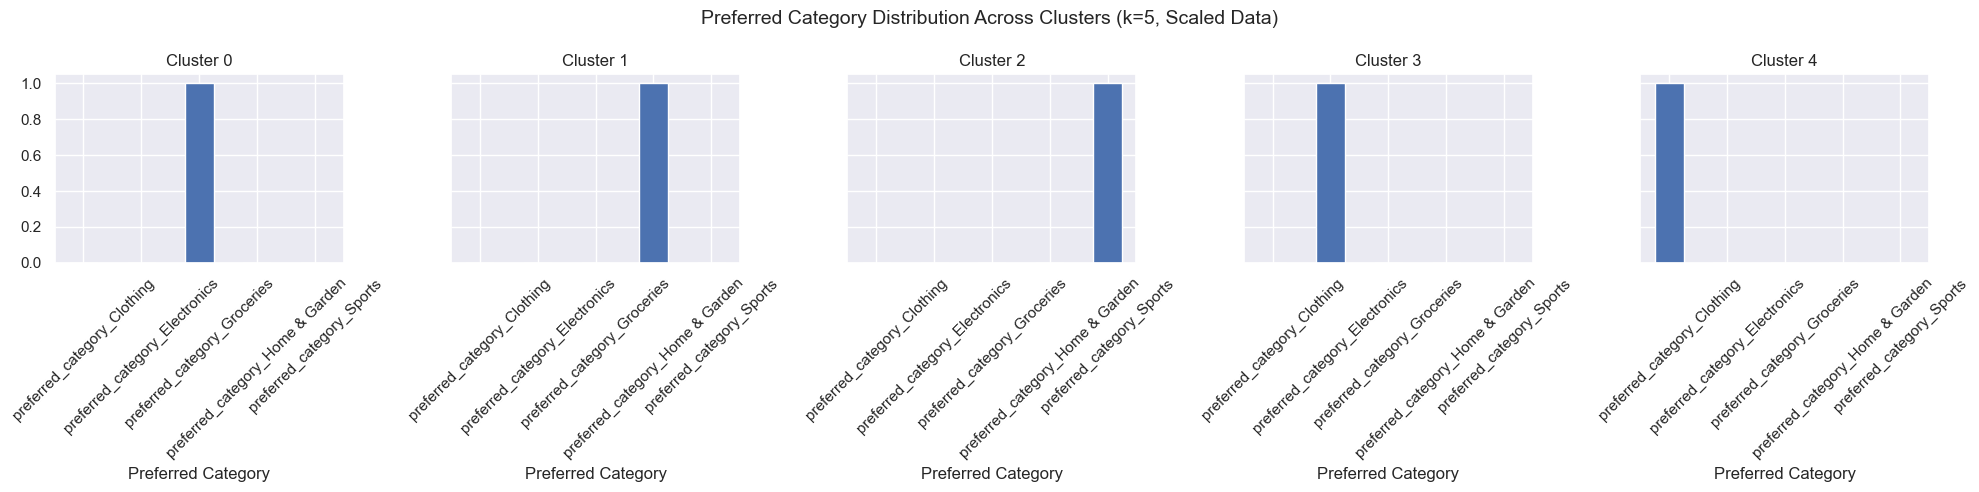

In [36]:
category_columns = ['preferred_category_Clothing', 'preferred_category_Electronics',
                    'preferred_category_Groceries', 'preferred_category_Home & Garden',
                    'preferred_category_Sports'] # List of one-hot encoded category columns

category_distribution_5_scaled = data.groupby('Cluster_5_Scaled')[category_columns].mean() # Group by 'Cluster_5_Scaled' and calculate mean for each category column

# Plotting category distributions for k=5 clusters
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True) # Create subplots, one for each cluster

for i, cluster_label in enumerate(category_distribution_5_scaled.index): # Loop through each cluster
    category_distribution_5_scaled.loc[cluster_label].plot(kind='bar', ax=axes[i], title=f'Cluster {cluster_label}') # Bar plot for each cluster
    axes[i].set_xlabel('Preferred Category') # X-axis label for each subplot
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels

plt.suptitle('Preferred Category Distribution Across Clusters (k=5, Scaled Data)', fontsize=14)
plt.ylabel('Proportion of Customers')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('imgs/15_cluster_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show() 

**Distinct Category Preferences for Each Cluster (k=5):** The bar charts reveal that each of the 5 clusters exhibits distinct preferred category profiles. This is excellent and shows that our segmentation is capturing meaningful differences in category preferences among customer groups.

### Cluster 0: Grocery-Focused 
Cluster 0 is strongly Grocery-focused, confirming a segment that prioritizes essential shopping.

### Cluster 1: Electronics-Leaning
Cluster 1 leans towards Electronics, with some interest in Home & Garden and Sports.

### Cluster 2: Home & Garden Focused
Cluster 2 is strongly Home & Garden focused, with some interest in Electronics.

### Cluster 3: Fashion, Tech & Sports - Balanced
Cluster 3 is a more balanced segment with preferences for Clothing, Electronics, and Sports, suggesting a lifestyle or discretionary spending segment.

### Cluster 4: Clothing-Focused
Cluster 4 is strongly Clothing-focused, with some secondary interest in Sports, representing a fashion-oriented segment.

**Category Preferences Refine Cluster Descriptions:** The preferred category distributions significantly enhance our initial descriptions based on spending and frequency. We can now refine the cluster labels and interpretations to be more category-specific.

**k=5 Segments:** The k=5 clusters seem to be specialized and category-focused. In k=5, these seem to be somewhat separated into a more purely "Electronics-leaning" segment (Cluster 1) and a more purely "Home & Garden-focused" segment (Cluster 2), while Cluster 0 remains distinctly "Grocery-focused." Cluster 4 in k=5 is clearly "Clothing-focused". 


# Step 35: Profile Clusters- Age Distribution by Cluster

C:\Users\jason\AppData\Local\Temp\ipykernel_34872\3648227971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_5_Scaled', y='age', data=data, palette='Set3')


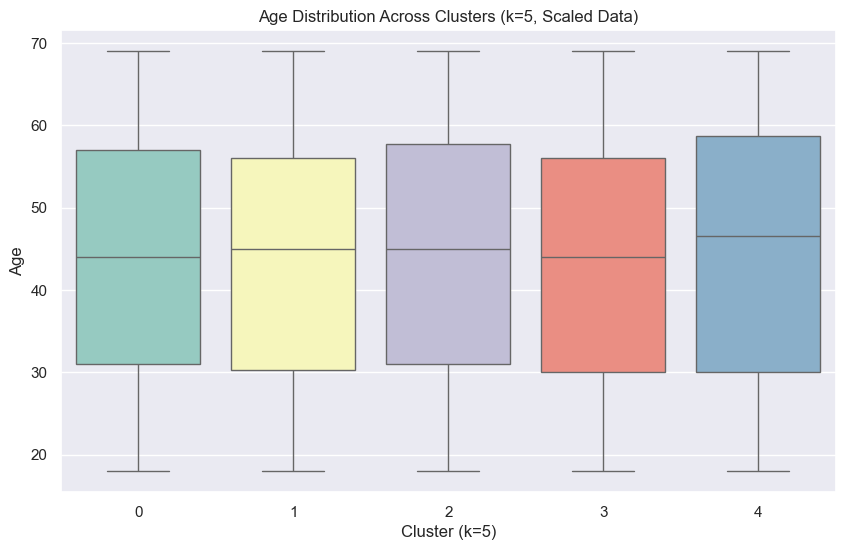

In [37]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Cluster_5_Scaled', y='age', data=data, palette='Set3') 
plt.title('Age Distribution Across Clusters (k=5, Scaled Data)') 
plt.xlabel('Cluster (k=5)') 
plt.ylabel('Age')
plt.savefig('imgs/16_age_by_cluster.png', dpi=300, bbox_inches='tight')
plt.show() 

### Cluster 3 (Balanced Fashion, Tech & Sports) - Older on Average
The most distinct observation is that Cluster 3 ("Balanced Fashion, Tech & Sports Mix") tends to be older on average compared to the other clusters. Its median age is noticeably higher (around 50 years old).

### Clusters 0, 1, 2 (Grocery, Electronics, Home & Garden) - Younger to Middle-Aged
Clusters 0 ("Pure Grocery Shoppers"), 1 ("Electronics & Outdoor Enthusiasts"), and 2 ("Home & Garden Specialists") have relatively similar and somewhat younger median ages, around 38-40 years old.

### Cluster 4 (Clothing Fanatics) - Middle-Aged
Cluster 4 ("Dedicated Fashionistas") has a median age around 45, placing it in a middle-aged category, older than Clusters 0, 1, 2 but younger than Cluster 3.

### Age Reinforces Lifestyle/Category-Based Segments
Age further refines our understanding of these category-focused segments. It makes intuitive sense that a segment interested in Fashion, Tech, and Sports in a balanced way (Cluster 3) might be slightly older and have different lifestyle priorities than segments primarily focused on Groceries (Cluster 0) or Home & Garden (Cluster 2).

### Age Helps Differentiate within Category Clusters
While Clusters 1 (Electronics) and 2 (Home & Garden) had similar spending/frequency profiles, age starts to show some differentiation, with Cluster 2 (Home & Garden) potentially being slightly younger on average than Cluster 1 (Electronics), though this difference is less pronounced than the age difference for Cluster 3.

### Age Adds a Demographic Dimension to Category Preference
Age provides another demographic layer to our category-based segments. We are moving beyond just what and how they buy, and now understanding who these customers are demographically.


# Step 36: Profile Clusters- Income Distribution by Cluster

C:\Users\jason\AppData\Local\Temp\ipykernel_34872\4143764093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_5_Scaled', y='income', data=data, palette='viridis')


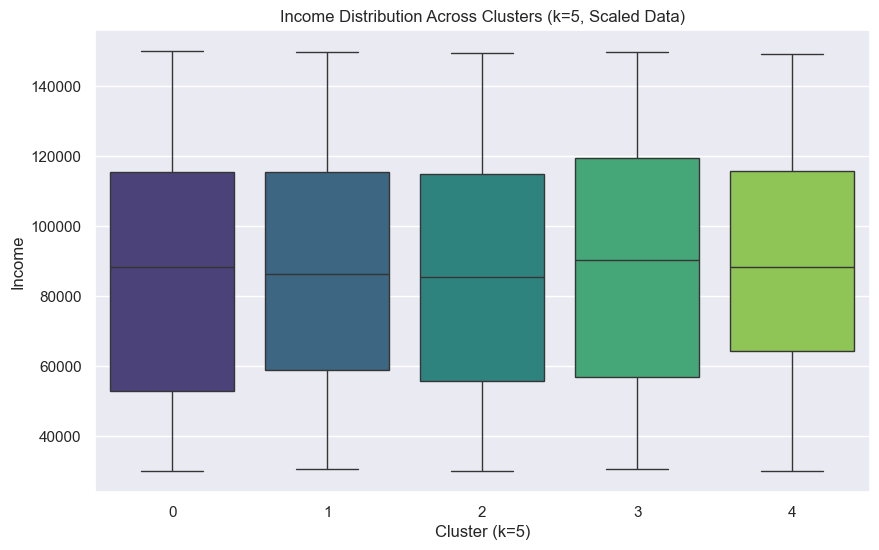

In [38]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Cluster_5_Scaled', y='income', data=data, palette='viridis') 
plt.title('Income Distribution Across Clusters (k=5, Scaled Data)')
plt.xlabel('Cluster (k=5)') 
plt.ylabel('Income') 
plt.savefig('imgs/17_income_by_cluster.png', dpi=300, bbox_inches='tight')
plt.show() 

### Cluster 3 (Balanced Fashion/Tech/Sports) - Highest Income
Consistent with age analysis, Cluster 3 ("Balanced Fashion, Tech & Sports Mix") has the highest median income, clearly standing out as the most affluent segment. This reinforces their "Big Spender" characteristic from spending score analysis.

### Cluster 4 (Dedicated Fashionistas) - Higher Income
Cluster 4 ("Dedicated Fashionistas") also exhibits a higher median income, though less extreme than Cluster 3, placing it in the higher-income bracket.

### Cluster 0 (Pure Grocery Shoppers) - Mid-to-Higher Income
Cluster 0 ("Pure Grocery Shoppers") surprisingly shows a mid-to-higher median income. This might seem counterintuitive for "grocery shoppers" but could represent a segment that prioritizes high-quality groceries, organic options, or convenience in grocery shopping, even with a higher income.

### Cluster 1 (Electronics & Outdoor Enthusiasts) - Mid-Range Income
Cluster 1 ("Electronics & Outdoor Enthusiasts") has a mid-range median income, aligning with a more general consumer segment interested in electronics and outdoor/home-related categories.

### Cluster 2 (Home & Garden Specialists) - Lowest Income
Cluster 2 ("Home & Garden Specialists") has the lowest median income among all clusters. This is interesting and suggests that the strong preference for Home & Garden in this segment might be driven by value-seeking or a focus on home improvement and DIY within a more budget-conscious segment.

### Income Further Differentiates Segments
Income distribution analysis significantly enhances the differentiation between the k=5 segments, especially in distinguishing Cluster 3 (highest income), Cluster 2 (lowest income), and positioning Clusters 0, 1, and 4 in the mid-to-higher income ranges.

### Income Adds Financial Capacity Dimension
Income provides a crucial financial capacity dimension to our segment profiles. We now have insights into both their spending behavior/preferences and their economic means.


# Step 37: Profile Clusters- Gender Distribution by Cluster

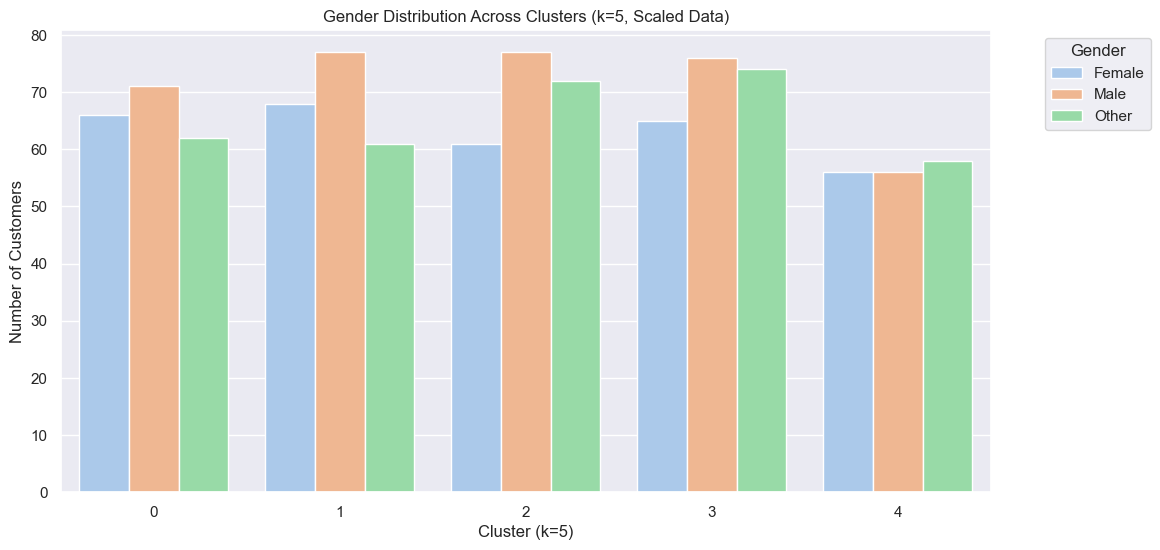

In [39]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x='Cluster_5_Scaled', hue='gender', data=data, palette='pastel')
plt.title('Gender Distribution Across Clusters (k=5, Scaled Data)') 
plt.xlabel('Cluster (k=5)') 
plt.ylabel('Number of Customers') 
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.savefig('imgs/18_gender_by_cluster.png', dpi=300, bbox_inches='tight')
plt.show() 

### Female Dominance in Most Segments
The analysis confirms a general trend of female dominance across most customer segments (Clusters 0, 1, 2, and 4).

### Cluster 4 (Fashionistas) - Highest Female Dominance
Cluster 4 ("Dedicated Fashionistas") exhibits the strongest female dominance, aligning perfectly with the stereotype of fashion-related categories being more heavily skewed towards female customers.

### Cluster 0 (Grocery Shoppers) - Also Strong Female Dominance
Cluster 0 ("Pure Grocery Shoppers") also shows very strong female dominance, which might reflect traditional household grocery shopping patterns.

### Cluster 3 (Balanced Fashion/Tech/Sports) - Least Female Dominance (Most Gender-Balanced)
Cluster 3 ("Balanced Fashion, Tech & Sports Mix") stands out as the least female-dominant segment, exhibiting the most gender balance among the 5 clusters. While still female-majority, the male proportion is noticeably higher compared to other clusters. This gender balance in a segment interested in Fashion, Tech, and Sports could be related to evolving gender roles and interests in these categories.

### Gender Reinforces Category and Demographic Profiles
Gender adds another important demographic dimension to our segment profiles, reinforcing the category preferences and age/income characteristics we've already identified.

### Gender-Targeted Marketing
Gender insights are directly actionable for marketing. For segments with strong gender dominance (like Clusters 0 and 4), marketing campaigns and messaging can be tailored to resonate specifically with the dominant gender. For more gender-balanced segments (like Cluster 3), marketing can adopt a more gender-neutral or broader appeal, or even test targeted campaigns towards both genders.


# Conclusion and Recommendations

## k=5 Customer Segment Profiles (Scaled Data)

This document summarizes the profiles of the 5 customer segments identified using K-Means clustering with k=5 on scaled data.

---

**Table: k=5 Customer Segment Profiles (Scaled Data)**

| Segment Label                                            | Spending Score | Purchase Frequency | Preferred Categories                                 | Age Profile           | Income Profile                   | Gender Profile         | Business Implication Summary                                                                                   |
|----------------------------------------------------------|----------------|--------------------------|------------------------------------------------------|-----------------------|------------------------------------|------------------------------------|--------------------------------------------------------------------------------------------------------------|
| **Segment 1: Female-Dominant Affluent Grocery Shoppers**       | Medium-High        | Medium-High          | **Primary: Groceries**                                | Median ~40, Broad Range          | Mid-to-Higher Median Income (\$85-90k) | Strong Female Majority       | Loyalty programs & grocery-focused promotions for affluent, frequent female shoppers.                        |
| **Segment 2: Female-Leaning Electronics & Outdoor Enthusiasts** | Moderate           | Moderate             | **Primary: Electronics**, Secondary: Home & Garden, Sports | Median ~40, Broad Range          | Mid-Range Median Income (\$80-85k)      | Female Majority            | Targeted marketing of electronics & outdoor gear to mid-income, female-leaning audience.                       |
| **Segment 3: Female-Leaning Home & Garden Specialists**         | Lower              | Lower                | **Primary: Home & Garden**, Secondary: Electronics (Minor)  | Median ~38-39, Broad Range       | Lowest Median Income (\$70-75k)      | Female Majority            | Value-focused promotions on Home & Garden for budget-conscious, female customers.                             |
| **Segment 4: Gender-Balanced Fashion/Tech/Sports Shoppers**   | Highest        | Moderate             | **Balanced: Clothing, Electronics, Sports**               | Median ~50, Broad, Wider IQR | Highest Median Income (\$105-115k)    | More Gender-Balanced       | Aspirational, trend-focused marketing for fashion, tech, sports to affluent, slightly older, gender-balanced group. |
| **Segment 5: Female-Dominant Dedicated Fashionistas**         | Moderate           | Highest          | **Primary: Clothing**, Secondary: Sports (Minor)      | Median ~45, Broad, Wider IQR | Higher Median Income (\$90-95k)      | Very Strong Female Majority| Trend-focused, exclusive marketing for clothing & fashion to high-frequency, fashion-centric female segment.    |

---

### Summary of k=5 Customer Segmentation (Scaled Data):

This customer segmentation project, utilizing K-Means clustering (k=5) on a dataset incorporating spending behavior, purchase frequency, and category preferences, has identified **five distinct customer segments**.

These segments are differentiated by:

*   **Spending Levels:** Ranging from "Lower" to "Highest" relative spending scores.
*   **Purchase Habits:**  Described by "Lower" to "Highest" purchase frequency.
*   **Preferred Product Categories:**  Highlighting primary and secondary category preferences (Groceries, Electronics, Home & Garden, Clothing, Sports).
*   **Demographic Profiles:**
    *   **Age:**  Characterized by median age and age range.
    *   **Income:** Indicated by median income levels (Lowest, Mid-Range, Mid-to-Higher, Highest).
    *   **Gender:**  Described by gender dominance (Female Majority, Strong Female Majority, More Gender-Balanced).

**Key Segments Identified:**

*   **Segment 1: Female-Dominant Affluent Grocery Shoppers:**  Highly loyal, prioritize grocery purchases, affluent, frequent female shoppers.
*   **Segment 2: Female-Leaning Electronics & Outdoor Enthusiasts:**  Prefer electronics primarily, with some interest in home & garden and sports, mid-income, female-leaning.
*   **Segment 3: Female-Leaning Home & Garden Specialists:**  Focus on home & garden, value-conscious, budget-sensitive female customers.
*   **Segment 4: Gender-Balanced Fashion/Tech/Sports Shoppers:** Affluent, slightly older, gender-balanced group with diverse preferences across fashion, tech, and sports categories.
*   **Segment 5: Female-Dominant Dedicated Fashionistas:**  Intensely focused on clothing and fashion, high purchase frequency, fashion-centric female segment.

**Business Value & Actionability:**

These five distinct profiles provide a **highly actionable framework** for the business. By understanding the specific needs, preferences, demographics, and spending behaviors of each segment, the business can:

*   **Tailor Marketing Strategies:** Develop targeted campaigns and messaging for each segment (e.g., value-driven promotions for "Home & Garden Specialists", aspirational fashion marketing for "Fashion/Tech/Sports Shoppers").
*   **Optimize Product Positioning:**  Adjust product offerings and assortments to better align with segment-specific demands (e.g., premium grocery lines for "Affluent Grocery Shoppers").
*   **Enhance Customer Engagement:** Create personalized and relevant customer experiences and loyalty programs for each segment (e.g., grocery-centric loyalty programs for "Grocery Shoppers").

This k=5 segmentation offers a **nuanced and practical approach** to developing customer-centric business strategies and maximizing customer lifetime value.